In [1]:
# Enable google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# make a root dir
!mkdir '/content/drive/MyDrive/good'

In [4]:
# Get the cwd
%cd '/content/drive/MyDrive/good'
# Clone the yolov5 repo
!git clone https://github.com/ultralytics/yolov5

/content/drive/MyDrive/good
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
%cd '/content/drive/MyDrive/good/yolov5'
# Install the dependencies
!pip install -r requirements.txt

/content/drive/MyDrive/good/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [6]:
%cd '/content/drive/My Drive/good'
# Unzip the data to release the contents
!unzip /content/drive/MyDrive/zoom.zip -d /content/drive/MyDrive/good

/content/drive/My Drive/good
Archive:  /content/drive/MyDrive/zoom.zip
  inflating: /content/drive/MyDrive/good/annotations/road0.xml  
  inflating: /content/drive/MyDrive/good/annotations/road1.xml  
  inflating: /content/drive/MyDrive/good/annotations/road10.xml  
  inflating: /content/drive/MyDrive/good/annotations/road100.xml  
  inflating: /content/drive/MyDrive/good/annotations/road101.xml  
  inflating: /content/drive/MyDrive/good/annotations/road102.xml  
  inflating: /content/drive/MyDrive/good/annotations/road103.xml  
  inflating: /content/drive/MyDrive/good/annotations/road104.xml  
  inflating: /content/drive/MyDrive/good/annotations/road105.xml  
  inflating: /content/drive/MyDrive/good/annotations/road106.xml  
  inflating: /content/drive/MyDrive/good/annotations/road107.xml  
  inflating: /content/drive/MyDrive/good/annotations/road108.xml  
  inflating: /content/drive/MyDrive/good/annotations/road109.xml  
  inflating: /content/drive/MyDrive/good/annotations/road11.xml

In [7]:
%cd '/content/drive/MyDrive/good'
# Convert the annotations from .xml to .txt for yolo
# Convert PASCAL VOC to Yolo format

import os
import xml.etree.ElementTree as ET

# Define the class mapping
classes = ["trafficlight", "stop", "crosswalk", "speedlimit"]
class_to_idx = {cls: idx for idx, cls in enumerate(classes)}

def convert_annotation(xml_file_path):
    in_file = open(xml_file_path)
    tree = ET.parse(in_file)
    root = tree.getroot()

    file_name = os.path.splitext(os.path.basename(xml_file_path))[0]
    with open(f"{file_name}.txt", "w") as out_file:
        for obj in root.iter("object"):
            cls = obj.find("name").text
            cls_idx = class_to_idx[cls]

            xml_box = obj.find("bndbox")
            b = (
                float(xml_box.find("xmin").text),
                float(xml_box.find("ymin").text),
                float(xml_box.find("xmax").text),
                float(xml_box.find("ymax").text),
            )

            width = float(root.find("size").find("width").text)
            height = float(root.find("size").find("height").text)

            x_center = (b[0] + b[2]) / (2 * width)
            y_center = (b[1] + b[3]) / (2 * height)
            w = (b[2] - b[0]) / width
            h = (b[3] - b[1]) / height

            out_file.write(f"{cls_idx} {x_center} {y_center} {w} {h}\n")

# Specify the directory where the PASCAL VOC XML annotation files are located
xml_dir = '/content/drive/MyDrive/good/annotations'

# Loop through all XML files in the directory
for xml_file in os.listdir(xml_dir):
    if xml_file.endswith(".xml"):
        xml_file_path = os.path.join(xml_dir, xml_file)
        convert_annotation(xml_file_path)

/content/drive/My Drive/good


In [8]:
import os

# Create the directory.
os.mkdir("/content/drive/MyDrive/good/Yolo Format")

In [9]:
# Move the the floating .txt files into the newly creatd yolo format dir
import shutil
source_file = '/content/drive/MyDrive/good'
destination_file = '/content/drive/MyDrive/good/Yolo Format'
for file in os.listdir(source_file):
  if file.endswith('.txt'):
    shutil.move(os.path.join(source_file, file), os.path.join(destination_file, file))


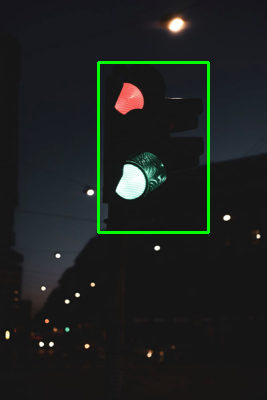

In [10]:
import cv2
from google.colab.patches import cv2_imshow

# Set the paths to the image and YOLOv8 annotation file
img_path = '/content/drive/MyDrive/good/images/road0.png'
ann_path = '/content/drive/MyDrive/good/Yolo Format/road0.txt'

# Load the image and its annotation file
img = cv2.imread(img_path)
with open(ann_path, "r") as f:
    lines = f.readlines()

# Loop through each line in the annotation file and draw the bounding boxes on the image
for line in lines:
    class_id, x_center_norm, y_center_norm, width_norm, height_norm = map(float, line.split())
    img_height, img_width, _ = img.shape
    x_center = int(x_center_norm * img_width)
    y_center = int(y_center_norm * img_height)
    width = int(width_norm * img_width)
    height = int(height_norm * img_height)
    x1 = int(x_center - width/2)
    y1 = int(y_center - height/2)
    x2 = int(x_center + width/2)
    y2 = int(y_center + height/2)
    color = (0, 255, 0)  # Green color for bounding box
    thickness = 2  # Thickness of bounding box
    img = cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

# Display the image with bounding boxes
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
import os
import random
import shutil

# Set the paths
base_directory = '/content/drive/MyDrive/good/yolov5/zoom'
images_directory = '/content/drive/MyDrive/good/images'
labels_directory = '/content/drive/MyDrive/good/Yolo Format'

# Define the train/val/test ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Create the train/val/test subdirectories in the images and labels folders
train_dir_images = os.path.join(base_directory, 'images', 'train')
val_dir_images = os.path.join(base_directory, 'images', 'val')
test_dir_images = os.path.join(base_directory, 'images', 'test')

train_dir_labels = os.path.join(base_directory, 'labels', 'train')
val_dir_labels = os.path.join(base_directory, 'labels', 'val')
test_dir_labels = os.path.join(base_directory, 'labels', 'test')

os.makedirs(train_dir_images, exist_ok=True)
os.makedirs(val_dir_images, exist_ok=True)
os.makedirs(test_dir_images, exist_ok=True)

os.makedirs(train_dir_labels, exist_ok=True)
os.makedirs(val_dir_labels, exist_ok=True)
os.makedirs(test_dir_labels, exist_ok=True)

# Get the list of all image files
image_files = os.listdir(images_directory)
image_files = [file for file in image_files if file.endswith('.png')]

# Shuffle the list of image files
random.shuffle(image_files)

# Split the image files into train, val, and test sets
train_size = int(train_ratio * len(image_files))
val_size = int(val_ratio * len(image_files))

train_files = image_files[:train_size]
val_files = image_files[train_size:train_size+val_size]
test_files = image_files[train_size+val_size:]

# Move the image files to the corresponding train/val/test directories
for file in train_files:
    src_path = os.path.join(images_directory, file)
    dest_path = os.path.join(train_dir_images, file)
    shutil.copy(src_path, dest_path)
    
    label_file = os.path.splitext(file)[0] + '.txt'
    src_path = os.path.join(labels_directory, label_file)
    dest_path = os.path.join(train_dir_labels, label_file)
    shutil.copy(src_path, dest_path)

for file in val_files:
    src_path = os.path.join(images_directory, file)
    dest_path = os.path.join(val_dir_images, file)
    shutil.copy(src_path, dest_path)
    
    label_file = os.path.splitext(file)[0] + '.txt'
    src_path = os.path.join(labels_directory, label_file)
    dest_path = os.path.join(val_dir_labels, label_file)
    shutil.copy(src_path, dest_path)

for file in test_files:
    src_path = os.path.join(images_directory, file)
    dest_path = os.path.join(test_dir_images, file)
    shutil.copy(src_path, dest_path)
    
    label_file = os.path.splitext(file)[0] + '.txt'
    src_path = os.path.join(labels_directory, label_file)
    dest_path = os.path.join(test_dir_labels, label_file)
    shutil.copy(src_path, dest_path)


In [12]:
%cd '/content/drive/MyDrive/good/yolov5/zoom'

/content/drive/MyDrive/good/yolov5/zoom


In [13]:
# Create a .yaml file
import yaml

config = {
    'age': 10,
    'project': 'YOLO'
}
with open('config.yaml', 'w') as f:
  yaml.dump(config, f, indent=4)

In [8]:
%cd '/content/drive/MyDrive/good/yolov5'

/content/drive/MyDrive/good/yolov5


In [10]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/good/yolov5/zoom/config.yaml 

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/good/yolov5/zoom/config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import os

os.listdir('/content/drive/MyDrive/good/yolov5/runs/train/exp3')

['weights',
 'hyp.yaml',
 'opt.yaml',
 'events.out.tfevents.1686516392.194b8fc3dace.11916.0',
 'labels_correlogram.jpg',
 'labels.jpg',
 'train_batch0.jpg',
 'train_batch1.jpg',
 'train_batch2.jpg',
 'results.csv',
 'val_batch0_labels.jpg',
 'val_batch0_pred.jpg',
 'val_batch1_labels.jpg',
 'val_batch1_pred.jpg',
 'val_batch2_labels.jpg',
 'val_batch2_pred.jpg',
 'PR_curve.png',
 'P_curve.png',
 'F1_curve.png',
 'R_curve.png',
 'confusion_matrix.png',
 'results.png']

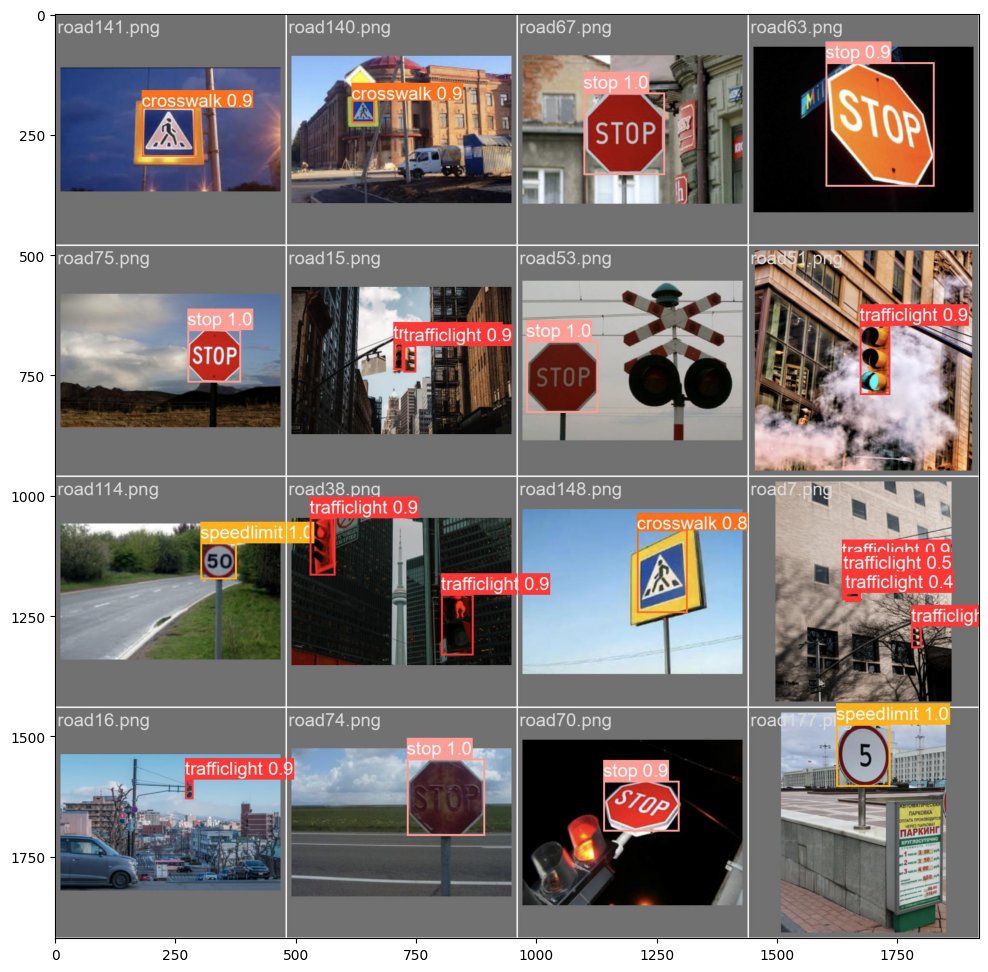

In [17]:
img = Image.open('/content/drive/MyDrive/good/yolov5/runs/train/exp3/val_batch0_pred.jpg')
plt.figure(figsize=(15, 12))
plt.imshow(img)

In [19]:
print('Thanks for coming ❤') 

Thanks for coming ❤
